# Statistical comparison of classifiers
Author: Iraitz Azcarate

## Comparacion de dos modelos sobre un dataset

La idea de este notebook es aplicar la estadistica para comparar modelos de Machine Learning. Para empezar, aplicaremos dos modelos distintos sobre la misma base de datos (datos pareados).

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Cargar el dataset
data = load_diabetes()
X = data.data
scaler = StandardScaler()
X= scaler.fit_transform(X)
y = data.target

# Configurar K-Fold Cross Validation
k = 100  # Número de divisiones
kf = KFold(n_splits=k, shuffle=True, random_state=42) #PAREADO

# Modelos
model_1 = LinearRegression()
model_2 = RandomForestRegressor(random_state=42)

# Almacenar errores
errors_model_1 = []
errors_model_2 = []

# Validación cruzada manual
for train_index, test_index in kf.split(X):

    # División del conjunto de datos
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Modelo 1: Linear Regression
    model_1.fit(X_train, y_train)
    y_pred_1 = model_1.predict(X_test)
    errors_model_1.append(mean_squared_error(y_test, y_pred_1))
    
    # Modelo 2: Random Forest
    model_2.fit(X_train, y_train)
    y_pred_2 = model_2.predict(X_test)
    errors_model_2.append(mean_squared_error(y_test, y_pred_2))

# Mostrar resultados
print(f"Promedio de errores (Modelo 1): {np.mean(errors_model_1):.3f}")
print(f"Promedio de errores (Modelo 2): {np.mean(errors_model_2):.3f}")



Promedio de errores (Modelo 1): 3020.019
Promedio de errores (Modelo 2): 3456.345


Una vez obtenidos los resultados, vamos a comprar los errores obtenidos en ambos modelos.

Ya que tenemos datos pareados para ambos modelos (en cada iteraccion del k fold cross validation, los datos de train y test de ambos modelos coinciden), vamos a comprobar si las diferencias de los errores siguen una distribucion normal

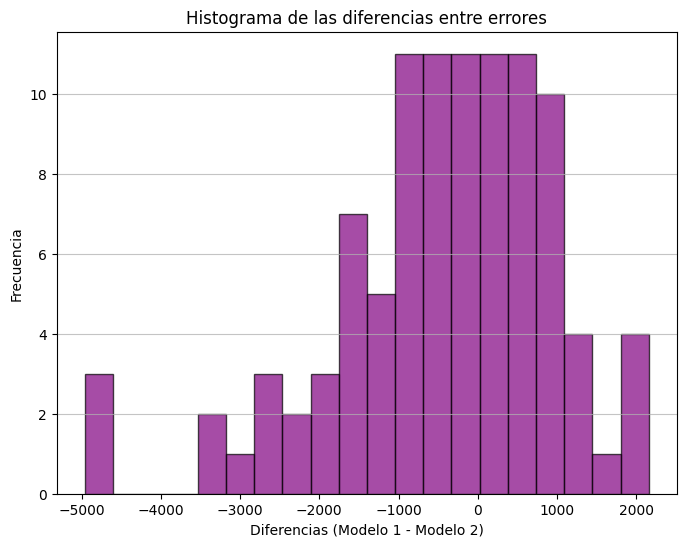

Shapiro-Wilk Test: Estadístico = 0.948, p-valor = 0.001


In [3]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
# Calcular diferencias
differences = np.array(errors_model_1) - np.array(errors_model_2)

# Test de normalidad: Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(differences)

# Configuración del histograma
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=20, alpha=0.7, color="purple", edgecolor="black")
plt.title("Histograma de las diferencias entre errores")
plt.xlabel("Diferencias (Modelo 1 - Modelo 2)")
plt.ylabel("Frecuencia")
plt.grid(axis="y", alpha=0.75)
plt.show()

# Resultados
# print(f"Diferencias entre errores: {differences}")
print(f"Shapiro-Wilk Test: Estadístico = {shapiro_stat:.3f}, p-valor = {shapiro_p:.3f}")


El p-valor es menor a 0.05, y por lo tanto, rechazamos la hipotesis nula, la cual dice que los datos siguen una distribucion normal. En consecuencia, no podemos suponer normalidad en nuestros datos.

Al no poder asumir normalidad, debemos realizar un test no parametrico para comparar ambos modelos. Hacemos uso del Mann-Whitney-U-test.

In [4]:
from scipy.stats import mannwhitneyu


# Prueba Mann-Whitney U
stat, p_value = mannwhitneyu(errors_model_1, errors_model_2, alternative='two-sided')

# Resultados
print(f"Estadístico U: {stat:.3f}")
print(f"p-valor: {p_value:.3f}")

if p_value < 0.05:
    print("Las distribuciones son significativamente diferentes (rechazamos H₀).")
else:
    print("No hay evidencia suficiente para afirmar que las distribuciones son diferentes (no rechazamos H₀).")


Estadístico U: 4481.000
p-valor: 0.205
No hay evidencia suficiente para afirmar que las distribuciones son diferentes (no rechazamos H₀).


C:\Users\irait\AppData\Local\Temp\ipykernel_12100\3713760720.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errors_model_1, shade=True, color="blue", label="Modelo 1")
C:\Users\irait\AppData\Local\Temp\ipykernel_12100\3713760720.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errors_model_2, shade=True, color="purple", label="Modelo 2")


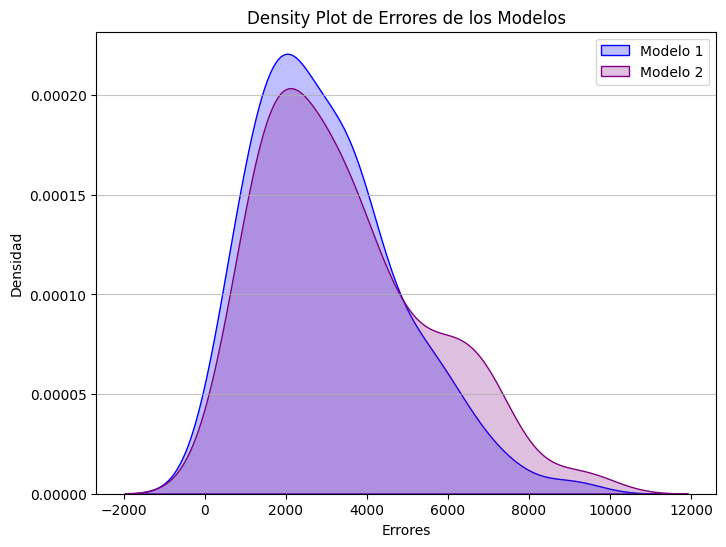

In [5]:
import seaborn as sns

# Primer gráfico de densidad: Modelo 1
plt.figure(figsize=(8, 6))

# Graficar la densidad del Modelo 1
sns.kdeplot(errors_model_1, shade=True, color="blue", label="Modelo 1")

# Graficar la densidad del Modelo 2
sns.kdeplot(errors_model_2, shade=True, color="purple", label="Modelo 2")

# Títulos y etiquetas
plt.title("Density Plot de Errores de los Modelos")
plt.xlabel("Errores")
plt.ylabel("Densidad")

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(axis="y", alpha=0.75)
plt.show()


Consecuentemente, podemos asumir que ambos modelos se comportan de manera similar para este conjunto de datos

## Comparación de multiples modelos sobre multiples datasets

Ahora, cambiamos de escenario. Hasta ahora hemos comparado dos modelos sobre una base de datos. A continuación, compararemos mas de dos modelos sobre un conjunto de bases de datos.

In [6]:
from sklearn.datasets import load_diabetes, fetch_california_housing, load_linnerud
from sklearn.tree import DecisionTreeRegressor

dataset_1 = load_diabetes()
dataset_2 = fetch_california_housing()
dataset_3 = load_linnerud()

In [ ]:
scaler = StandardScaler()

X1 = dataset_1.data
X1 = scaler.fit_transform(X1)
y1 = dataset_1.target

X2 = dataset_2.data
X2 = scaler.fit_transform(X2)
y2 = dataset_2.target

X3 = dataset_3.data
X3 = scaler.fit_transform(X3)
y3 = dataset_3.target

# Configurar K-Fold Cross Validation
k = 5 
kf = KFold(n_splits=k, shuffle=True, random_state=42) #PAREADO

# Modelos
model_1 = LinearRegression()
model_2 = RandomForestRegressor(random_state=42)
model_3 = DecisionTreeRegressor(max_depth=5, random_state=42)

# Almacenar errores
errors_model_1 = []
errors_model_2 = []
errors_model_3 = []

df = pd.DataFrame(columns = ['Linear Regression', 'Random Forest', 'Decision tree'])

# Validación cruzada manual
for dataset in [[X1,y1], [X2,y2], [X3,y3]]:
    X , y = dataset
    a=0
    for train_index, test_index in kf.split(X):
        a+=1
        # División del conjunto de datos
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Modelo 1: Linear Regression
        model_1.fit(X_train, y_train)
        y_pred_1 = model_1.predict(X_test)
        errors_model_1.append(mean_squared_error(y_test, y_pred_1))
        # Modelo 2: Random Forest
        model_2.fit(X_train, y_train)
        y_pred_2 = model_2.predict(X_test)
        errors_model_2.append(mean_squared_error(y_test, y_pred_2))
        model_3.fit(X_train, y_train)
        y_pred_3 = model_3.predict(X_test)
        errors_model_3.append(mean_squared_error(y_test, y_pred_3))

    # Mostrar resultados
    print(f"Promedio de errores (Modelo 1): {np.mean(errors_model_1):.3f}")
    print(f"Promedio de errores (Modelo 2): {np.mean(errors_model_2):.3f}")
    print(f"Promedio de errores (Modelo 3): {np.mean(errors_model_3):.3f}")
    df = pd.concat([df, pd.DataFrame([{'Linear Regression':np.mean(errors_model_1), 'Random Forest': np.mean(errors_model_2), 'Decision tree':np.mean(errors_model_3)}])], ignore_index=True)



Promedio de errores (Modelo 1): 3015.382
Promedio de errores (Modelo 2): 3312.586
Promedio de errores (Modelo 3): 4370.317


C:\Users\irait\AppData\Local\Temp\ipykernel_12100\2990348600.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{'Linear Regression':np.mean(errors_model_1), 'Random Forest': np.mean(errors_model_2), 'Decision tree':np.mean(errors_model_3)}])], ignore_index=True)


Promedio de errores (Modelo 1): 1507.956
Promedio de errores (Modelo 2): 1656.420
Promedio de errores (Modelo 3): 2185.418
Promedio de errores (Modelo 1): 1103.532
Promedio de errores (Modelo 2): 1191.355
Promedio de errores (Modelo 3): 1558.973


In [19]:
df.head()

,Linear Regression,Random Forest,Decision tree
0,3015.381694,3312.585940,4370.317304
1,1507.956133,1656.419738,2185.417525
2,1103.532186,1191.354607,1558.972795


Una vez evaluados los distintos modelos sobre todos los dataset, aplicamos el test de Friedman para ver si los modelos clasificadores se comportan de manera similar o si por el contrario hay diferencias significativas entre almenos un par de clasificadores.

In [20]:
from scipy.stats import friedmanchisquare
# pip install scikit-posthocs
import scikit_posthocs as sp

stat, p_value = friedmanchisquare(*[df[col] for col in df.columns])

print(f'Estadístico de Friedman: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print("Hay diferencias significativas entre los modelos.")
    
    nemenyi_result = sp.posthoc_nemenyi_friedman(df.values)
    print(nemenyi_result)

else:
    print("No hay diferencias significativas entre los modelos.")

Estadístico de Friedman: 6.0
Valor p: 0.04978706836786395
Hay diferencias significativas entre los modelos.
          0         1         2
0  1.000000  0.438489  0.038035
1  0.438489  1.000000  0.438489
2  0.038035  0.438489  1.000000


Como vemos, hay diferencias significativas entre los modelos 0 y 2, es decir, entre LinearRegression y Decision tree. Este resultado lo obtenemos una vez el test de Friedman nos avisa de que hay ciertas diferencias en nuestro conjunto de modelos, y consecuentemente, realizamos un test 'post-hoc' para ver realmente cuales de nuestros modelos son los causantes de estas diferencias. 